# Одинарное эспоненциально сглаживание

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams
import random
#rcParams['figure.figsize'] = 14,6
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import plotly.express as px

import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
from datetime import timedelta as dt
import os
import plotly.io as pio 
pio.renderers.default = 'iframe'

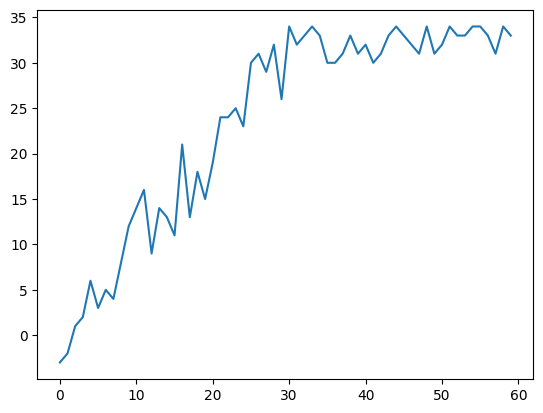

In [2]:
# Создадим какой то тренд данных с восхождением и с выходом на полочку
n_points=30
data_slopped = []
for n in range(n_points):
    data_slopped.append(n+random.randint(-5,+5))
data = np.concatenate ((np.array(data_slopped), np.random.randint(30,35, n_points)))
plt.plot(data)

Математическое описание алгоритма одинарного экспоненциального сглаживания

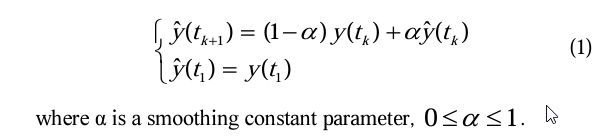

In [3]:
# y = [3, 5, 9, 20]
# def expo_smooth(data, alpha=0.4):
#     forcast = [data[0]]
#     for i in range(1, len(data)+1):
#         predict = alpha * data[i-1] + (1 - alpha) * forcast[i - 1]
#         forcast.append(predict)
#     return forcast
def expo_smooth(series, alpha):
    result = [series[0]]  # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n - 1])
    return result

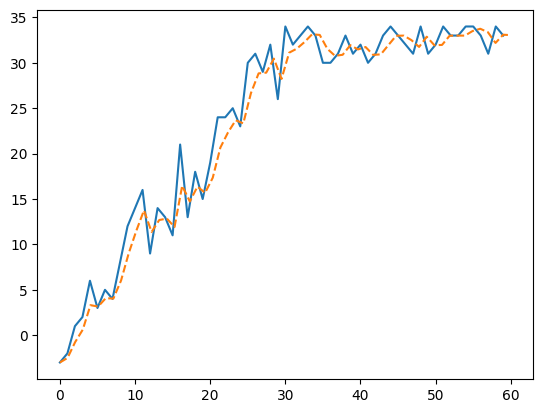

In [4]:
data_new = data
plt.plot(data_new)
plt.plot(np.linspace(0,len(data_new),len(data_new)), expo_smooth(data_new, alpha=0.5), linestyle='--')

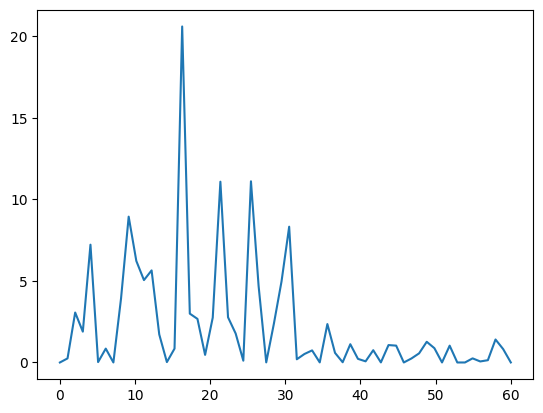

In [5]:
plt.plot(np.linspace(0,len(data_new),len(data_new)), (data_new - expo_smooth(data_new, alpha=0.5))**2)

In [6]:
#Будем использовать данные по курсу пары BTC-USD. 
#Источник данных https://www.kaggle.com/datasets/jessevent/all-crypto-currencies
btc_df = pd.read_csv('data/BTC-USD.csv', index_col=['timestamp'], parse_dates=['timestamp'])
# Удалим все столбцы, кроме "close"
btc_df.drop(['adjclose', 'open', 'high', 'volume', 'low'], axis= 1 , inplace= True)
# возьмем только первые 500 строк
data = btc_df.close.iloc[1500:5000]

In [7]:
# Соберем нужные нам графики вместе.
# Построим графики результата экспоненциального сглаживания для коэфф. Альфа 0.1 и 0.8 (пограничные значения)
# Построим графики квадратической ошибки. 
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)
fig.add_trace(go.Scatter(x=data.index, y=data, mode='lines', name='Data'),1,1)
fig.add_trace(go.Scatter(x=data.index, y=expo_smooth(data, 0.1), mode='lines', name=f'Expo Smooth normal alpha = 0.1'),1,1)
fig.add_trace(go.Scatter(x=data.index, y=expo_smooth(data, 0.8), mode='lines', name=f'Expo Smooth normal alpha = 0.8'),1,1)
fig.add_trace(go.Scatter(x=data.index, y=(data - expo_smooth(data, 0.1))**2, mode='lines', name='SE alpha = 0.1'),2,1)
fig.add_trace(go.Scatter(x=data.index, y=(data - expo_smooth(data, 0.8))**2, mode='lines', name='SE alpha = 0.8'),2,1)
fig.show()

C:\Users\o2clo\AppData\Local\Temp\ipykernel_23504\937142473.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\o2clo\AppData\Local\Temp\ipykernel_23504\937142473.py:11: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



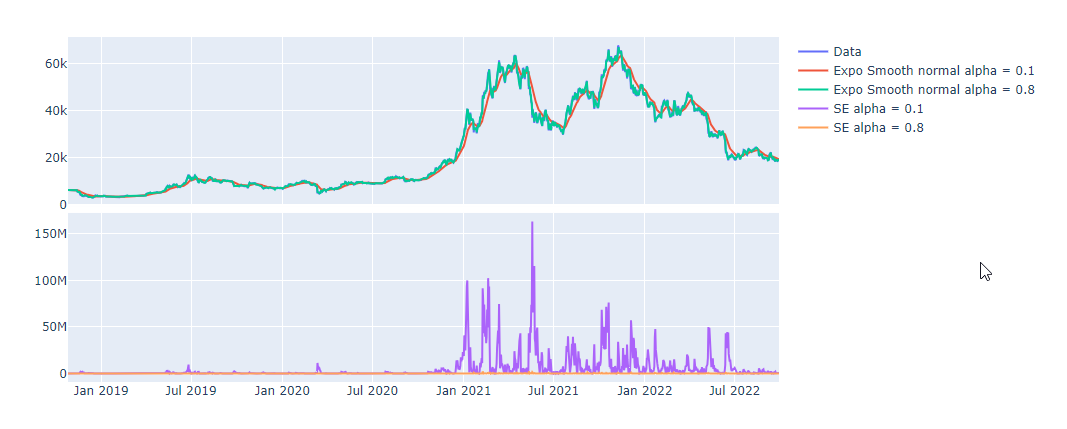